In [1]:
require(data.table)
require(ggplot2)
require(grid)
library("lattice")
library(gridExtra)

example2<-read.csv("example_times2", header=FALSE,sep=",")
print(example2)

for(i in 1:length(example2[,2])) {
    temp=example2[i,]
    temp2<-temp[!is.na(temp)]
    start<-temp2[1:(length(temp2)-1)]
    end<-temp2[2:length(temp2)]
    assign(paste("birdstart",i,sep=""),start)
    assign(paste("birdend",i,sep=""),end)

    }



print(birdstart3)
print(birdend3)

Loading required package: data.table
Loading required package: ggplot2
Loading required package: grid


  V1         V2        V3        V4        V5        V6        V7        V8
1  0 0.18904962 0.3034995 0.4165666 0.4546589 0.8274818 0.9473928 1.0679438
2  0 0.19812922 0.3094343 0.3164245 0.4098865 0.5187221 0.5810563 0.7091094
3  0 0.17553946 0.2031333 0.2740170 0.2755231 0.5244574 0.7125623 0.7689278
4  0 0.07415259 0.3283154 0.3665531 0.4381911 0.4763641 0.5761257 0.6530493
         V9       V10       V11      V12      V13      V14      V15      V16
1 1.1011814 1.3374317 1.3814393 1.704299 1.961900 2.031695 2.226312 2.356432
2 0.7590913 0.7929957 0.8936353 1.142483 1.257668 1.411742 1.472977 1.773780
3 1.0051949 1.1752267 1.1767997 1.413022 1.469803 1.660458 1.775542 1.954942
4 0.7186353 0.8719415 1.1265046 1.410567 1.427817 1.551951 1.627853 1.731857
       V17      V18      V19      V20      V21      V22      V23      V24
1 2.389954 2.753504 2.782353 2.924072 3.020623 3.185502 3.418518 3.622597
2 1.893466 1.976880 2.004254 2.108577 2.266009 2.475572 2.610668 2.863791
3 2.198484 2.

Warning message in data.table(Set = c(rep(c("bower", "forage"), length(birdstart1)/2)), :
“Item 1 is of size 78 but maximum size is 79 (recycled leaving remainder of 1 items)”

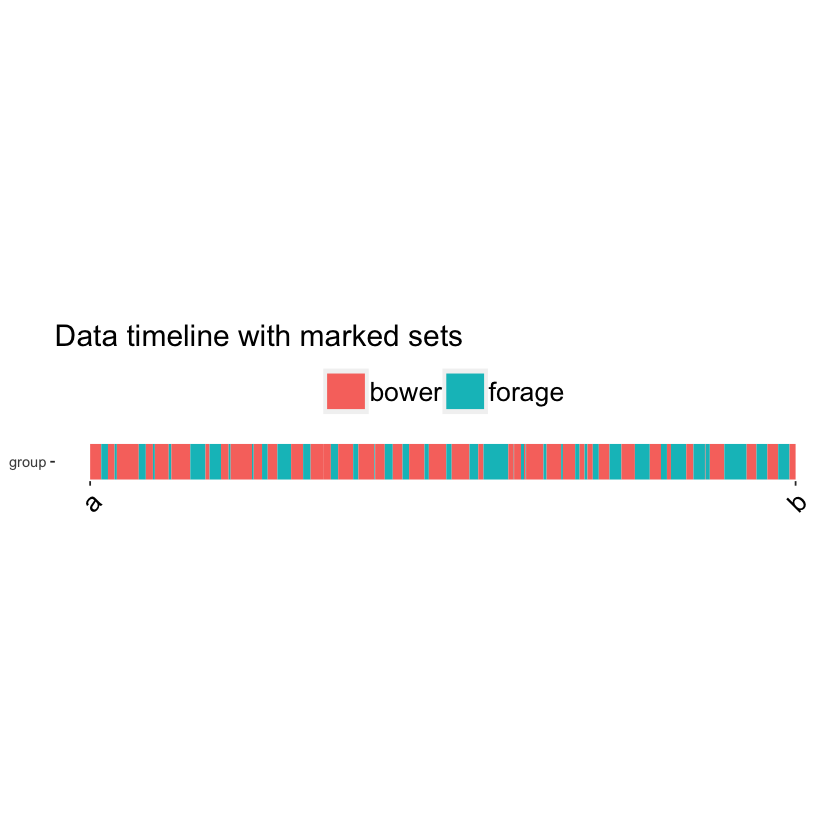

In [2]:
#Instead of creating setsTimeline, import our data
setsTimeline <- data.table(Set=c(rep(c("bower","forage"),length(birdstart1)/2)),
                           StartDate= birdstart1,
                           EndDate= birdend1
                          )

#add in labels based on mating
#setsTimeline[,StartLabel:=as.POSIXct(StartDate,tz="UTC",origin="1970-01-01")]

#add in breaks from 
breaks <- c(0,12)
labels <- c("a","b")

ggplot(setsTimeline, aes(colour=Set)) + 
  geom_segment(aes(x=StartDate, xend=EndDate, y="group", yend="group"), size=10) +
  theme(panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(), 
        panel.background = element_blank(),
        aspect.ratio=5e-02, 
        axis.text.x = element_text(colour='black', angle = 45, size = 16, hjust = 1, vjust = 1),
        legend.text = element_text(colour='black', size = 16),
        legend.title = element_text(colour='black', size = 0),
        legend.position = 'top',
        plot.title = element_text(colour='black', size = 18),
        panel.spacing = unit(1, "cm")) +
  xlab(NULL) + 
  ylab(NULL) +
  ggtitle("Data timeline with marked sets") +
  coord_cartesian(xlim = c(0,12), ylim = NULL) +
  scale_x_continuous(breaks=breaks,labels=labels)

Warning message in data.table(Set = c(rep(c("bower", "forage"), length(birdstart1)/2)), :
“Item 1 is of size 78 but maximum size is 79 (recycled leaving remainder of 1 items)”Warning message in data.table(Set = c(rep(c("bower", "forage"), length(birdstart3)/2)), :
“Item 1 is of size 92 but maximum size is 93 (recycled leaving remainder of 1 items)”Warning message in data.table(Set = c(rep(c("bower", "forage"), length(birdstart4)/2)), :
“Item 1 is of size 82 but maximum size is 83 (recycled leaving remainder of 1 items)”

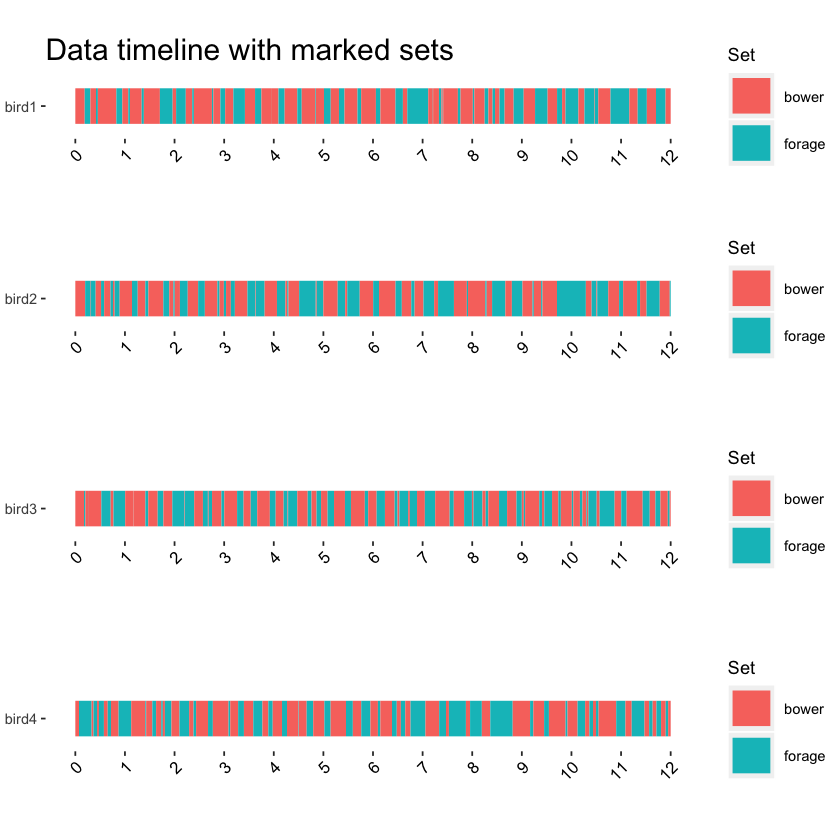

In [10]:

breaks <- c(0,1,2,3,4,5,6,7,8,9,10,11,12)
labels <- c("0","1","2","3","4","5","6","7","8","9","10","11","12")


setsTimeline <- data.table(Set=c(rep(c("bower","forage"),length(birdstart1)/2)),
                           StartDate= birdstart1,
                           EndDate= birdend1
                          )

p1<-ggplot(setsTimeline, aes(colour=Set)) + 
  geom_segment(aes(x=StartDate, xend=EndDate, y="bird1", yend="bird1"), size=10) +
  theme(panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(), 
        panel.background = element_blank(),
        aspect.ratio=10e-02, 
        axis.text.x = element_text(colour='black', angle = 45, size = 10, hjust = 1, vjust = 1),
        plot.title = element_text(colour='black', size = 18),
        panel.spacing = unit(1, "cm"),
        plot.margin = unit(c(0.1, 0.1, 0.1, 0.1), "cm")) +
  xlab(NULL) + 
  ylab(NULL) +
  ggtitle("Data timeline with marked sets") +
  coord_cartesian(xlim = c(0,12), ylim = NULL) +
  scale_x_continuous(breaks=breaks,labels=labels)


setsTimeline <- data.table(Set=c(rep(c("bower","forage"),length(birdstart2)/2)),
                           StartDate= birdstart2,
                           EndDate= birdend2
                          )




p2<-ggplot(setsTimeline, aes(colour=Set)) + 
  geom_segment(aes(x=StartDate, xend=EndDate, y="bird2", yend="bird2"), size=10) +
  theme(panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(), 
        panel.background = element_blank(),
        aspect.ratio=10e-02, 
        axis.text.x = element_text(colour='black', angle = 45, size = 10, hjust = 1, vjust = 1),
        plot.title = element_text(colour='black', size = 18),
        panel.spacing = unit(1, "cm"),
        plot.margin = unit(c(0.1, 0.1, 0.1, 0.1), "cm")) +
  xlab(NULL) + 
  ylab(NULL) +
  coord_cartesian(xlim = c(0,12), ylim = NULL) +
  scale_x_continuous(breaks=breaks,labels=labels)



setsTimeline <- data.table(Set=c(rep(c("bower","forage"),length(birdstart3)/2)),
                           StartDate= birdstart3,
                           EndDate= birdend3
                          )




p3<-ggplot(setsTimeline, aes(colour=Set)) + 
  geom_segment(aes(x=StartDate, xend=EndDate, y="bird3", yend="bird3"), size=10) +
  theme(panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(), 
        panel.background = element_blank(),
        aspect.ratio=10e-02, 
        axis.text.x = element_text(colour='black', angle = 45, size = 10, hjust = 1, vjust = 1),
        plot.title = element_text(colour='black', size = 18),
        panel.spacing = unit(1, "cm"),
        plot.margin = unit(c(0.1, 0.1, 0.1, 0.1), "cm")) +
  xlab(NULL) + 
  ylab(NULL) +
  coord_cartesian(xlim = c(0,12), ylim = NULL) +
  scale_x_continuous(breaks=breaks,labels=labels)




setsTimeline <- data.table(Set=c(rep(c("bower","forage"),length(birdstart4)/2)),
                           StartDate= birdstart4,
                           EndDate= birdend4
                          )



p4<-ggplot(setsTimeline, aes(colour=Set)) + 
  geom_segment(aes(x=StartDate, xend=EndDate, y="bird4", yend="bird4"), size=10) +
  theme(panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(), 
        panel.background = element_blank(),
        aspect.ratio=10e-02, 
        axis.text.x = element_text(colour='black', angle = 45, size = 10, hjust = 1, vjust = 1),
        plot.title = element_text(colour='black', size = 18),
        panel.spacing = unit(1, "cm"),
        plot.margin = unit(c(0.1, 0.1, 0.1, 0.1), "cm")) +
  xlab(NULL) + 
  ylab(NULL) +
  coord_cartesian(xlim = c(0,12), ylim = NULL) +
  scale_x_continuous(breaks=breaks,labels=labels)

grid.arrange(p1,p2,p3,p4, nrow = 4)



In [ ]:
print(rep(c("bower","forage"),length(birdstart3)/2))
print(birdstart3)

In [ ]:
print(rep(c("bower","forage"),length(birdstart1)/2))
print(birdstart1)

In [ ]:
print(rep(c("bower","forage"),length(birdstart2)/2))
print(birdstart2)

In [ ]:
print(rep(c("bower","forage"),length(birdstart4)/2))
print(birdstart4)

[1] 13 13

In [7]:
list(range(13))

[[1]]
[1] 13 13